In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
# load data
df_train = pd.read_csv('data/leftnet_encoding_embedding_train_data/test_predictions.csv')
df_test = pd.read_csv('data/leftnet_encoding_embedding_test_data/test_predictions.csv')
comp_data = pd.read_csv('selected_data.csv')
comp_data_indexed = comp_data.set_index('mpids')
df_train['bg_comp'] = df_train['mpids'].map(
    lambda mpid: comp_data_indexed['band_gap'].get(mpid, float('nan'))
)
df_test['bg_comp'] = df_test['mpids'].map(
    lambda mpid: comp_data_indexed['band_gap'].get(mpid, float('nan'))
)


df_train['error'] = df_train['prediction'] - df_train['bg']
df_test['error'] = df_test['prediction'] - df_test['bg']

# get mean relative error in a column
df_train['mre'] = df_train['error'] / df_train['bg']
df_test['mre'] = df_test['error'] / df_test['bg']

In [3]:
df_train

,mpids,bg,prediction,bg_comp,error,mre
0,mp-20078,1.670,1.446653,1.0749,-0.223347,-0.133741
1,mp-667338,3.000,3.051067,2.5064,0.051067,0.017022
2,mp-985592,3.100,2.525015,2.2955,-0.574985,-0.185479
3,mp-1192376,0.570,0.996322,0.6838,0.426322,0.747934
4,mp-2423265,1.000,1.221124,1.3214,0.221124,0.221124
...,...,...,...,...,...,...
1211,mp-390,3.200,2.924513,2.0586,-0.275487,-0.086090
1212,mp-540962,4.905,5.207708,4.8558,0.302708,0.061714
1213,mp-22408,2.450,1.274346,0.5880,-1.175654,-0.479859
1214,mp-504886,5.450,5.323403,2.9411,-0.126597,-0.023229


In [4]:
# filter out the data with mre > 0.3 and error >0.5 at same time
df_train_filtered = df_train[(df_train['mre'] > 0.3) & (df_train['error'] > 0.5)]
df_test_filtered = df_test[(df_test['mre'] > 0.3) & (df_test['error'] > 0.5)]



In [5]:
df_test_filtered

,mpids,bg,prediction,bg_comp,error,mre
15,mp-998552,3.000,4.084170,3.5394,1.084170,0.361390
19,mp-1004532,3.780,6.146102,4.5103,2.366102,0.625953
20,mp-27962,2.260,3.833391,1.1181,1.573391,0.696191
25,mp-567556,1.400,2.223282,1.1429,0.823282,0.588058
26,mp-4666,1.358,1.871639,1.4257,0.513639,0.378232
29,mp-1190579,1.600,2.452381,1.1043,0.852381,0.532738
36,mp-22988,1.835,3.672526,2.1535,1.837526,1.001377
39,mp-1202825,1.860,2.833208,2.0318,0.973208,0.523230
40,mp-20282,2.550,3.387744,3.3374,0.837744,0.328527
45,mp-812,2.840,5.274989,3.9458,2.434989,0.857390


In [6]:
df_train_filtered

,mpids,bg,prediction,bg_comp,error,mre
7,mp-9252,0.700,1.825272,1.6863,1.125272,1.607532
24,mp-1194731,2.060,2.762730,2.5537,0.702730,0.341131
46,mp-1315,0.658,2.223863,2.7574,1.565863,2.379731
49,mp-4988,1.300,2.359600,1.8124,1.059600,0.815077
53,mp-20782,1.230,2.217964,1.3847,0.987964,0.803223
...,...,...,...,...,...,...
1154,mp-1056,0.950,3.664440,3.9006,2.714440,2.857305
1157,mp-542067,1.590,2.222831,1.2429,0.632831,0.398007
1169,mp-1009756,0.460,1.049817,0.6495,0.589817,1.282211
1182,mp-849770,1.100,1.987961,1.0727,0.887961,0.807237


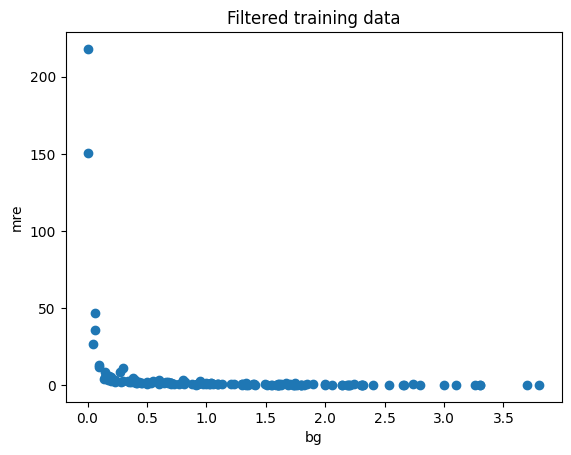

In [7]:
# make a plot of filtered data based on the bg value
import matplotlib.pyplot as plt
plt.scatter(df_train_filtered['bg'], df_train_filtered['mre'])
plt.xlabel('bg')
plt.ylabel('mre')
plt.title('Filtered training data')
plt.show()


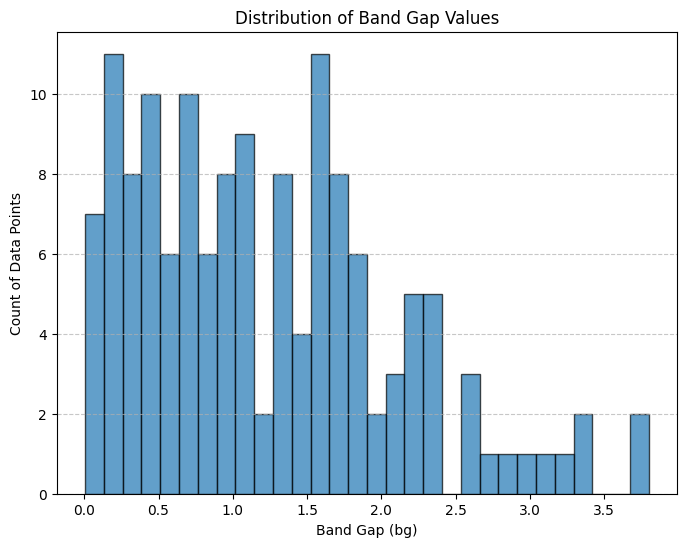

In [8]:
# Plot the histogram of the 'bg' column
plt.figure(figsize=(8, 6))
plt.hist(df_train_filtered['bg'], bins=30, edgecolor='black', alpha=0.7)

plt.title('Distribution of Band Gap Values')
plt.xlabel('Band Gap (bg)')
plt.ylabel('Count of Data Points')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

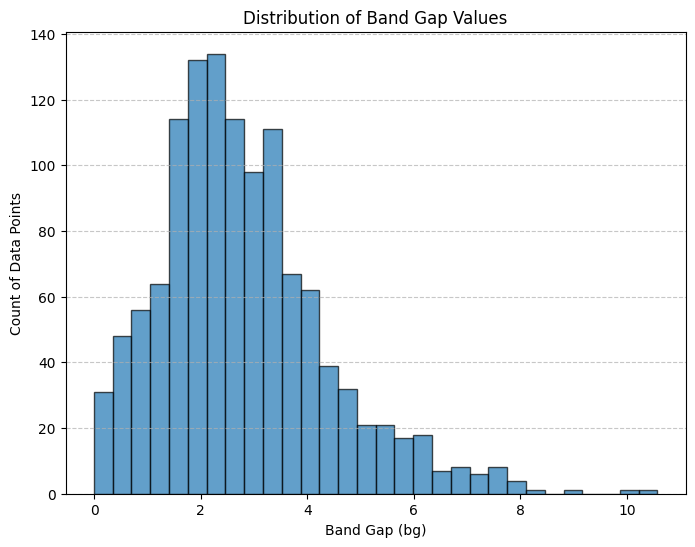

In [33]:
# Plot the histogram of the 'bg' column
plt.figure(figsize=(8, 6))
plt.hist(df_train['bg'], bins=30, edgecolor='black', alpha=0.7)

plt.title('Distribution of Band Gap Values')
plt.xlabel('Band Gap (bg)')
plt.ylabel('Count of Data Points')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [9]:
# calculate the mae of df_test for 0.5<bg<5
df_test_filtered = df_test[(df_test['bg'] > 0.5) & (df_test['bg'] < 5)]
mae = np.mean(np.abs(df_test_filtered['error']))
mae

0.6775158293103448

In [10]:
df_test_filtered

,mpids,bg,prediction,bg_comp,error,mre
0,mp-9770,1.45,1.846531,0.6102,0.396532,0.273470
1,mp-1195243,1.38,1.632359,1.2132,0.252360,0.182869
2,mp-29502,2.50,2.118630,1.8540,-0.381370,-0.152548
3,mp-1178577,2.44,2.587321,2.1792,0.147321,0.060377
4,mp-1202506,1.22,1.686952,0.6250,0.466952,0.382747
...,...,...,...,...,...,...
130,mp-1094040,2.90,2.623417,0.5713,-0.276583,-0.095373
131,mp-35493,3.60,2.431382,0.8251,-1.168618,-0.324616
132,mp-863430,3.00,2.160549,0.6561,-0.839451,-0.279817
133,mp-756297,1.23,2.317033,1.1791,1.087033,0.883767
